In [1]:
import os
import numpy as np
from simsopt import load
from pathlib import Path
from simsopt.geo import SurfaceRZFourier

nphi = 60
ntheta = 60
N_interpolation = 10
ncoils = 4
output_path = 'surfs_between_nfp3'
this_path = '/Users/rogeriojorge/local/ISTELL'
results_path = os.path.join(this_path, 'results_both_nfp3')
coils_path = os.path.join(results_path, f'optimal_coils/optimal_coils/ncoils_{ncoils}_order_7_R1_0.41_length_target_3.5_weight_0.0014_max_curvature_9.4_weight_0.00077_msc_2.5e+01_weight_0.00018_cc_0.1_weight_1.2e+01')
bs1 = load(os.path.join(coils_path,"biot_savart1.json"))
bs1_dofs = bs1.x
bs2 = load(os.path.join(coils_path,"biot_savart2.json"))
bs2_dofs = bs2.x
print(f"Coil currents 1: {[bs2.coils[i].current.get_value() for i in range(ncoils)]}")
print(f"Coil currents 2: {[bs1.coils[i].current.get_value() for i in range(ncoils)]}")

Path(results_path).mkdir(parents=True, exist_ok=True)
os.chdir(results_path)
filename1 = os.path.join('..','results_QH_nfp3','input.ISTTOK_final_QH')
filename2 = os.path.join('..','results_QA_nfp3','input.ISTTOK_final_QA')

surf1 = SurfaceRZFourier.from_vmec_input(filename1, range="half period", nphi=nphi, ntheta=ntheta)
surf2 = SurfaceRZFourier.from_vmec_input(filename2, range="half period", nphi=nphi, ntheta=ntheta)
surf_between = SurfaceRZFourier.from_vmec_input(filename1, range="half period", nphi=nphi, ntheta=ntheta)
surf1_dofs = surf1.x
surf2_dofs = surf2.x

interp_factors = np.linspace(0, 1, N_interpolation, endpoint=True)
Path(output_path).mkdir(parents=True, exist_ok=True)
for i, factor in enumerate(interp_factors):
    surf_between.x = (1 - factor) * surf1_dofs + factor * surf2_dofs
    bs1.x = (1 - factor) * bs1_dofs + factor * bs2_dofs
    bs1.set_points(surf_between.gamma().reshape((-1, 3)))
    BdotN1 = (np.sum(bs1.B().reshape((nphi, ntheta, 3)) * surf_between.unitnormal(), axis=2)) / np.linalg.norm(bs1.B().reshape((nphi, ntheta, 3)), axis=2)
    surf_between.to_vtk(os.path.join(output_path, f"surf_between_halfnfp_{i}"), extra_data={"B.n/B": BdotN1[:, :, None]})
    # bs2.set_points(surf_between.gamma().reshape((-1, 3)))
    # BdotN2 = (np.sum(bs2.B().reshape((nphi, ntheta, 3)) * surf_between.unitnormal(), axis=2)) / np.linalg.norm(bs2.B().reshape((nphi, ntheta, 3)), axis=2)
    # surf_between.to_vtk(os.path.join(output_path, f"surf2_between_halfnfp_{i}"), extra_data={"B.n/B": BdotN2[:, :, None]})

Coil currents 1: [74557.17254383375, 91543.14226964157, 207979.24802040998, -37597.21126096609]
Coil currents 2: [61753.49066448136, 115692.68006988829, 222.18827352642913, 183278.1531800169]


/opt/homebrew/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


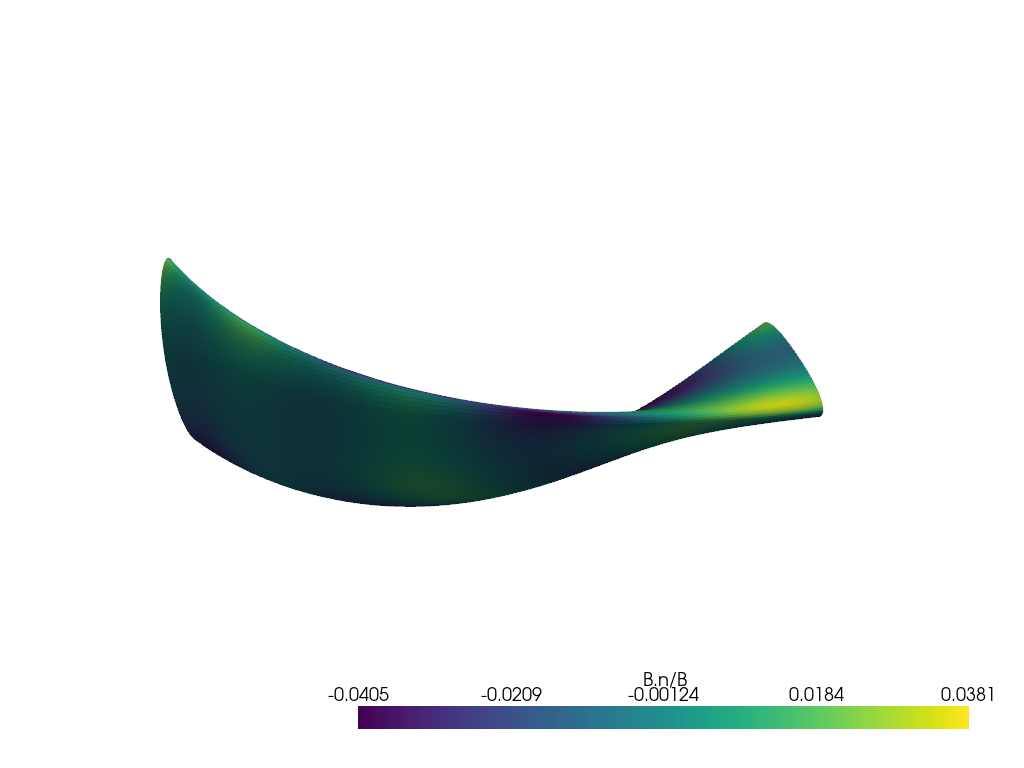

/opt/homebrew/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


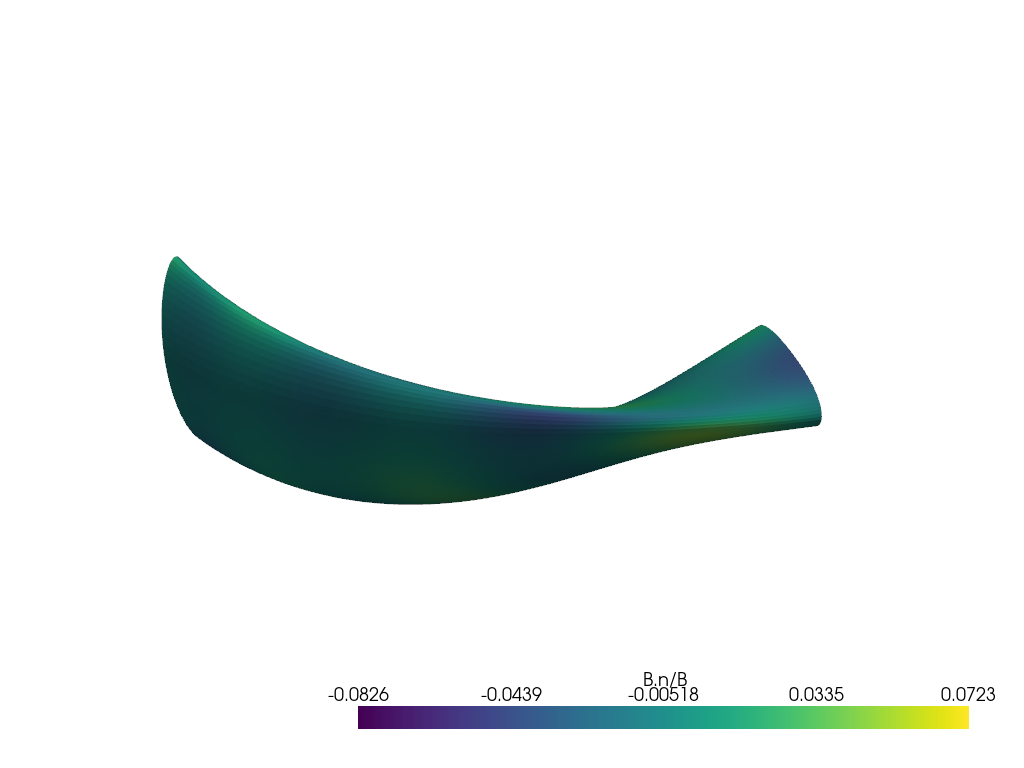

/opt/homebrew/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


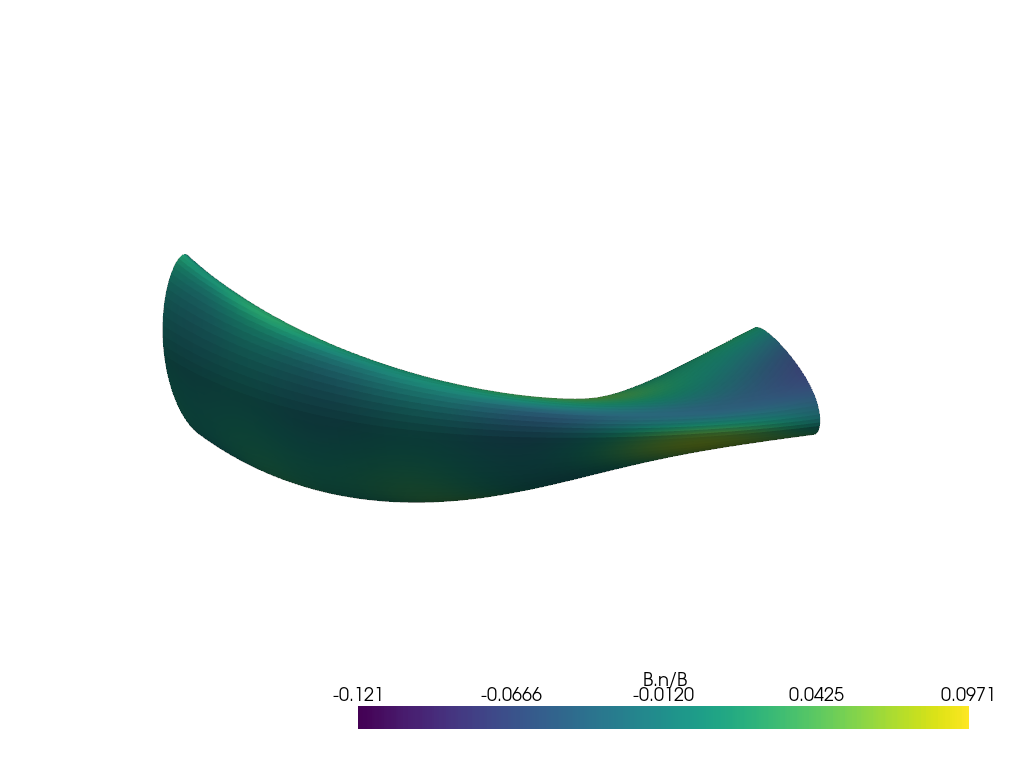

/opt/homebrew/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


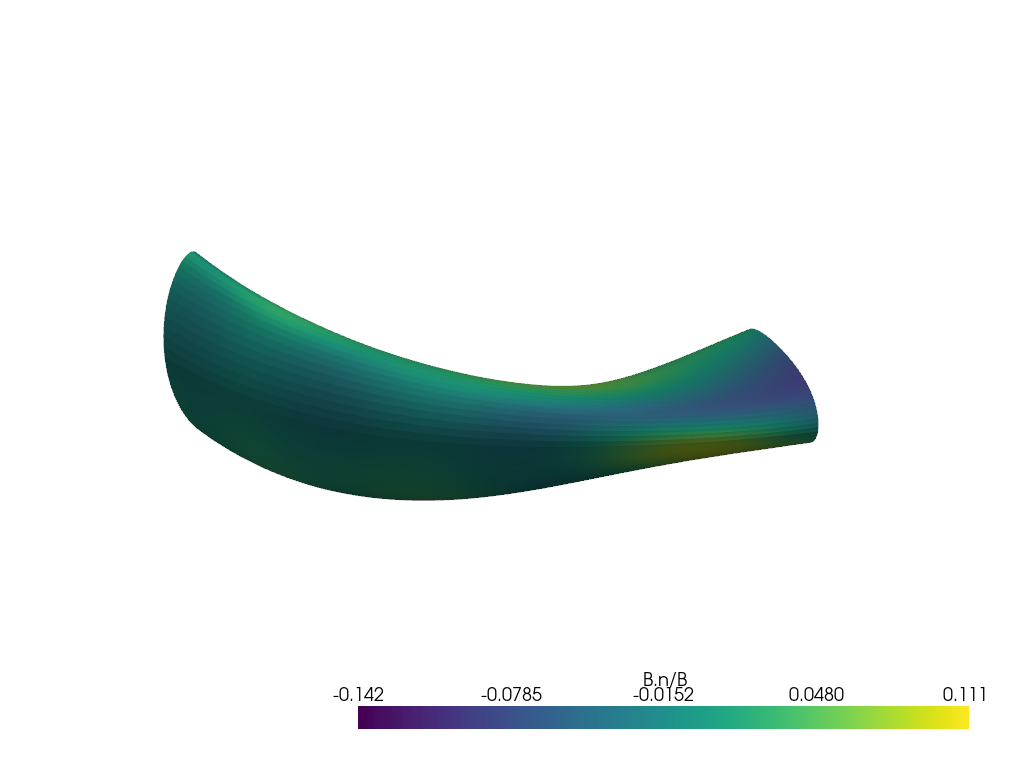

/opt/homebrew/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


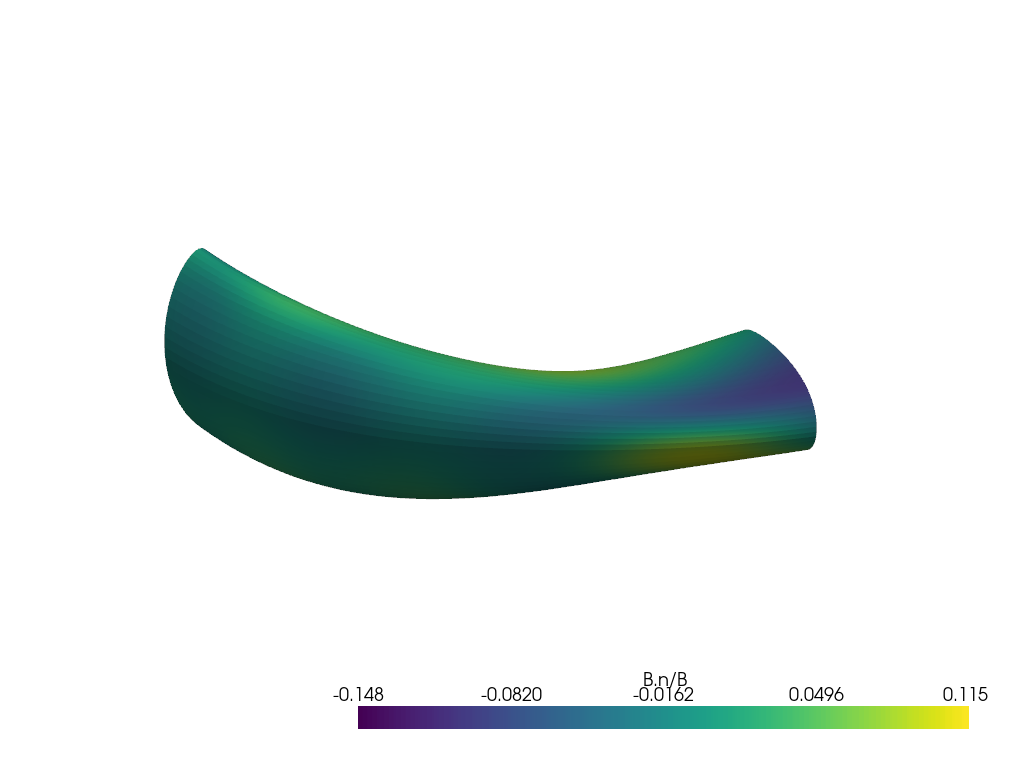

/opt/homebrew/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


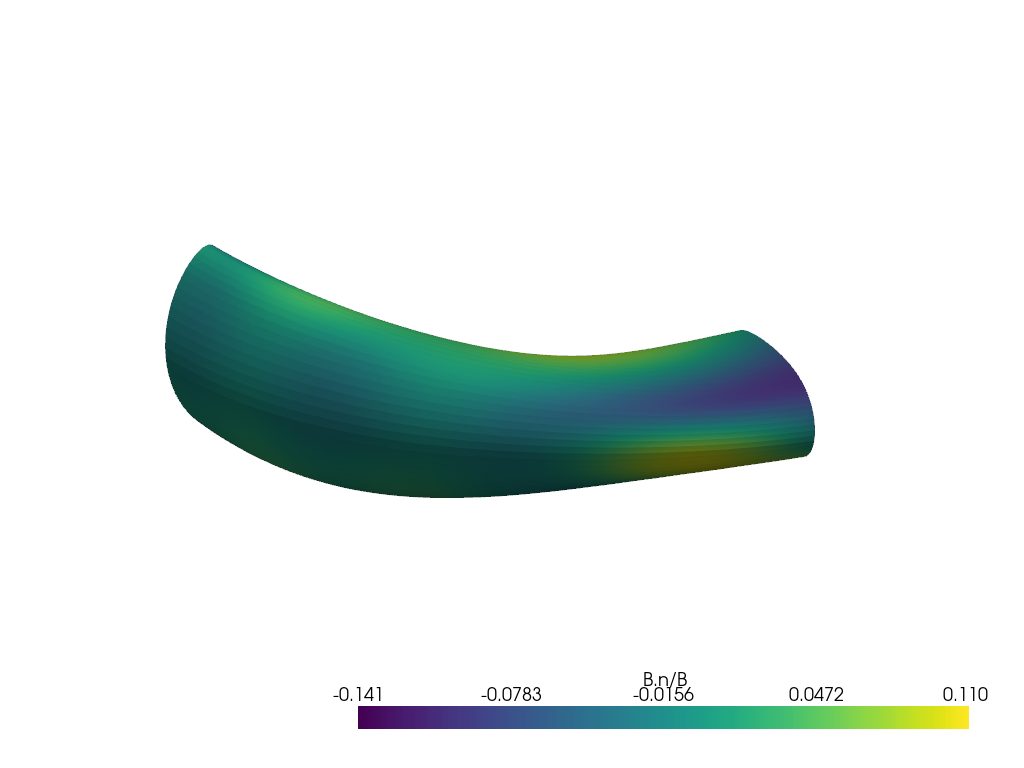

/opt/homebrew/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


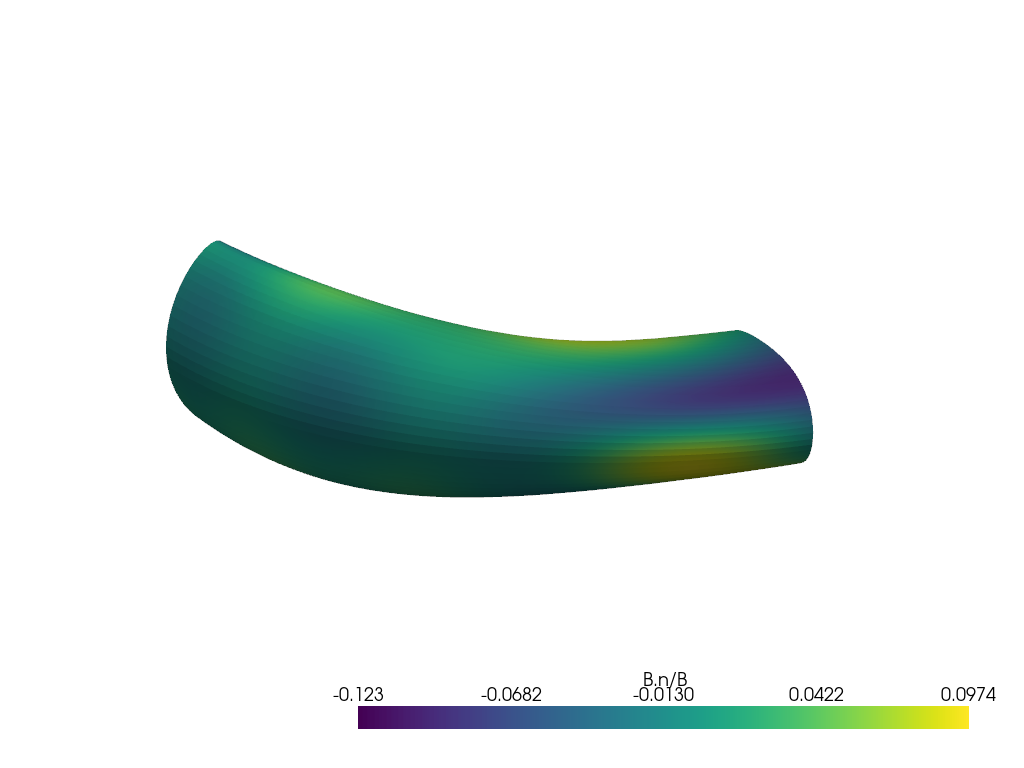

/opt/homebrew/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


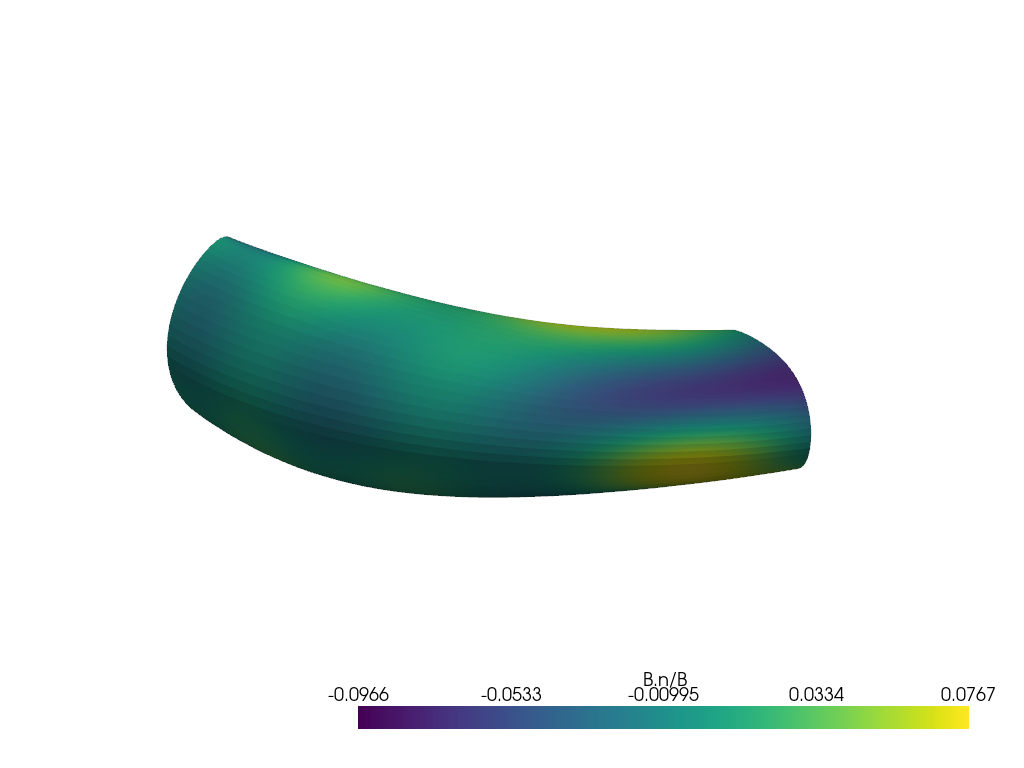

/opt/homebrew/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


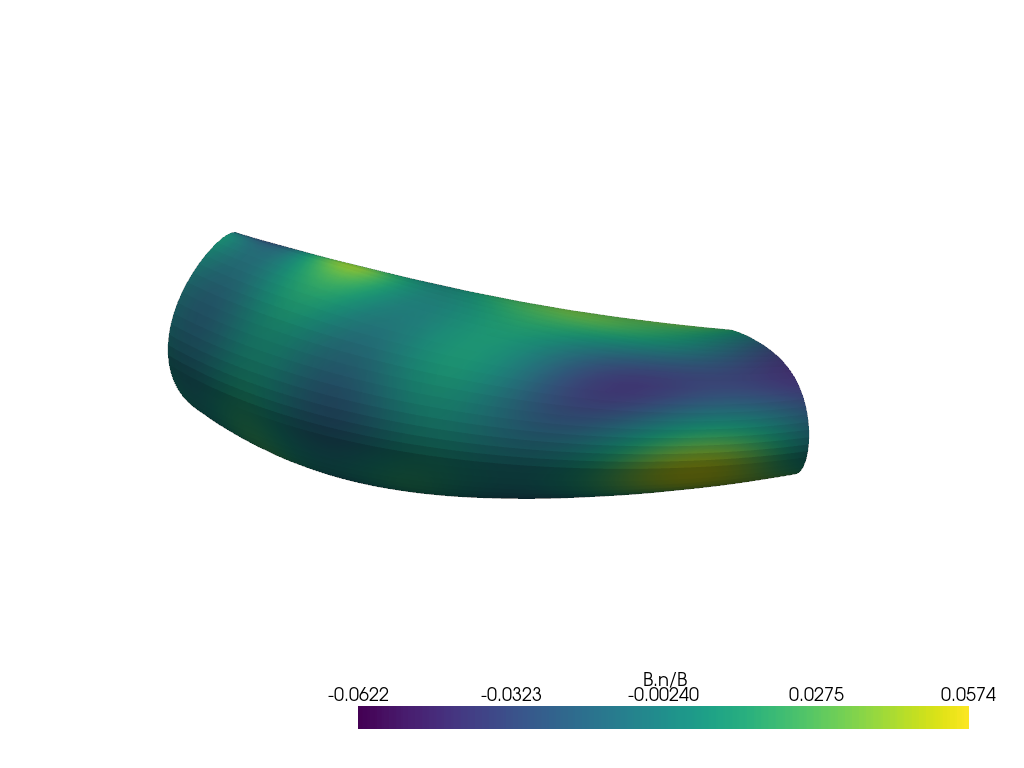

/opt/homebrew/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


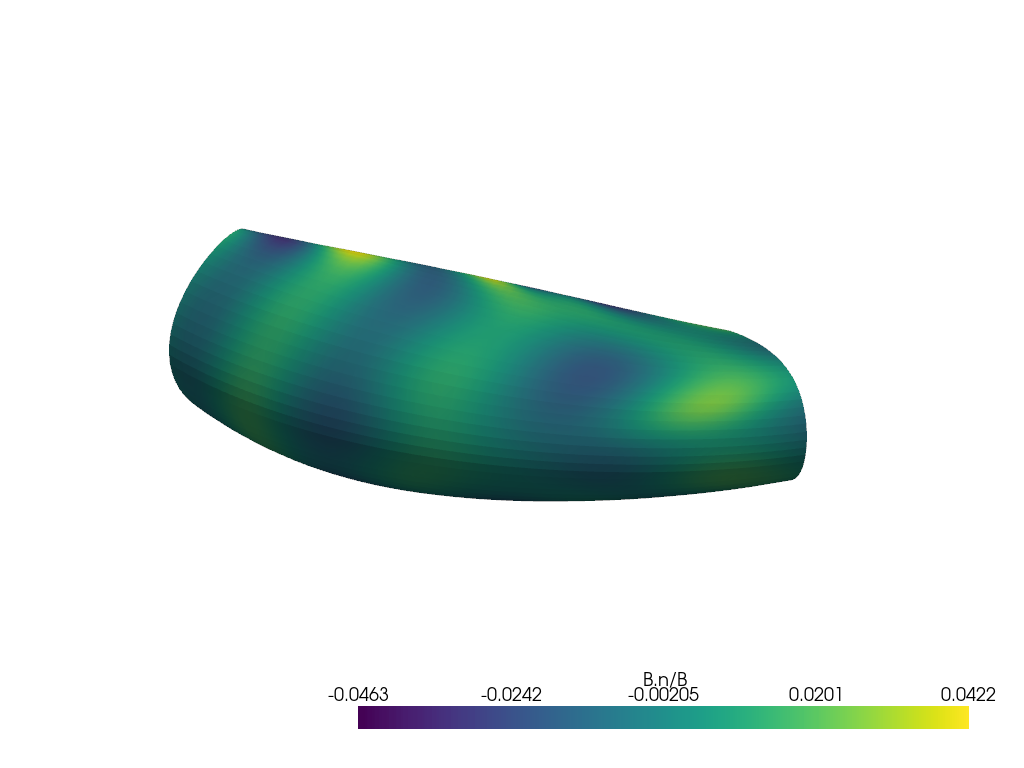

/opt/homebrew/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


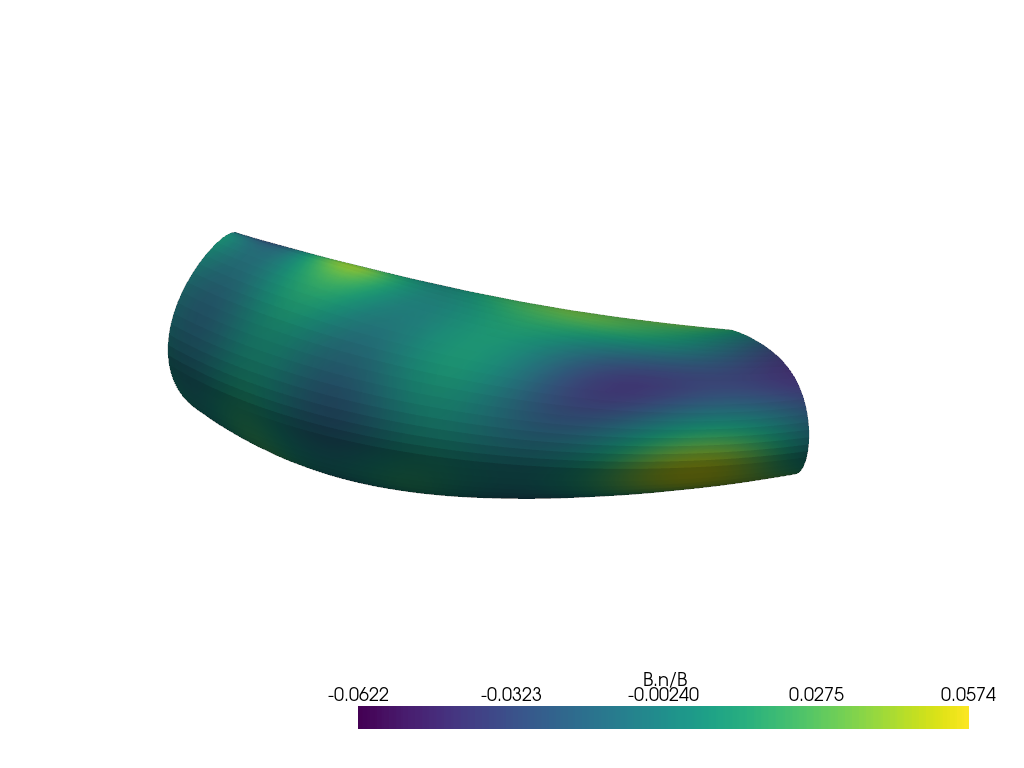

/opt/homebrew/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


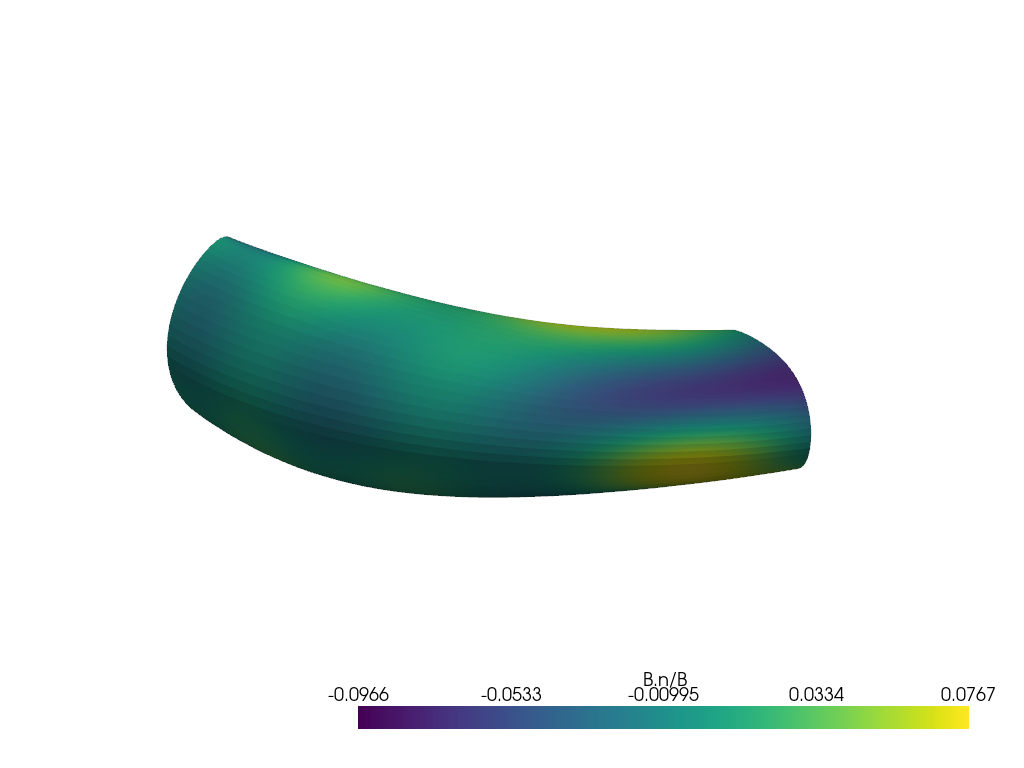

/opt/homebrew/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


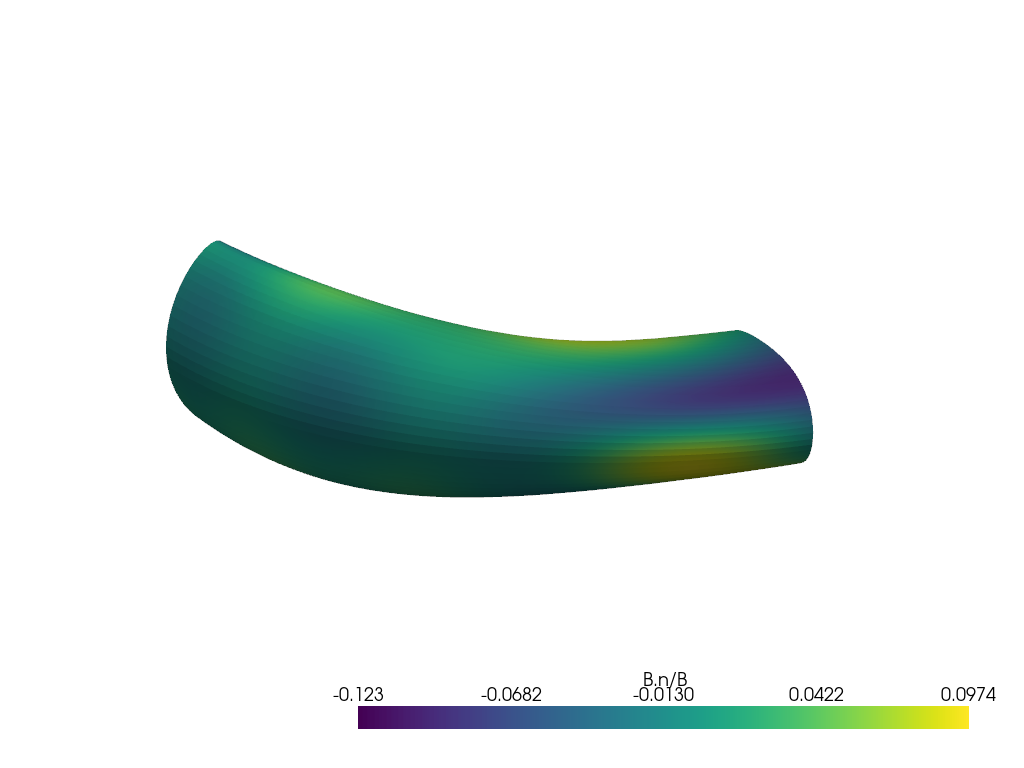

/opt/homebrew/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


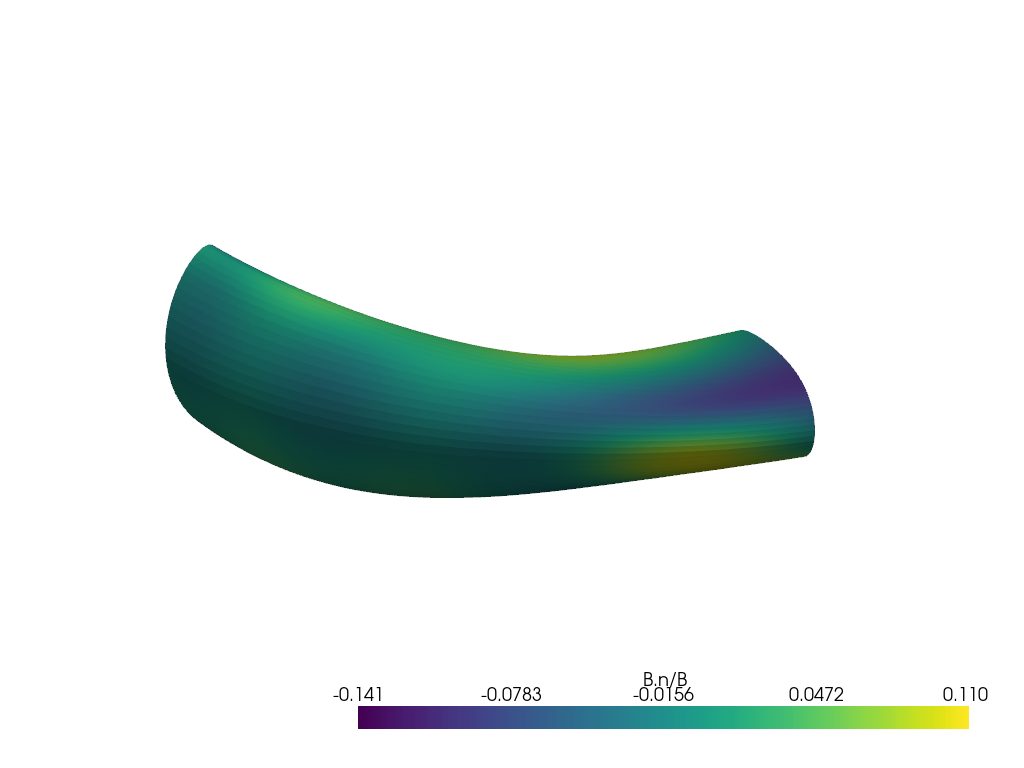

/opt/homebrew/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


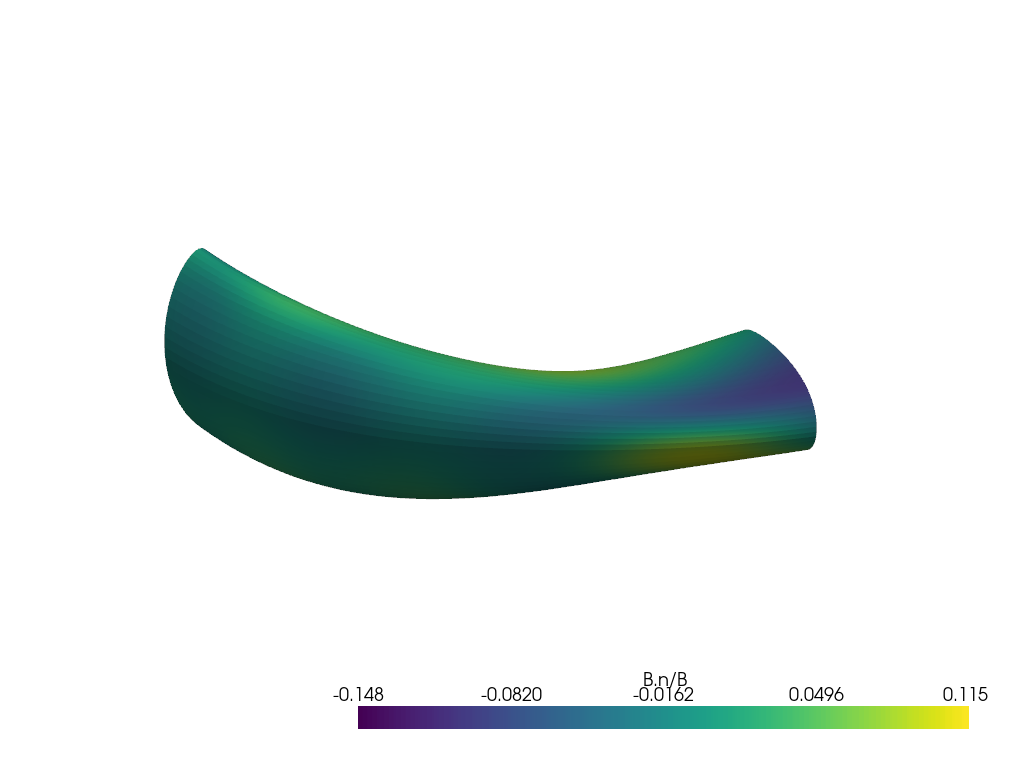

/opt/homebrew/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


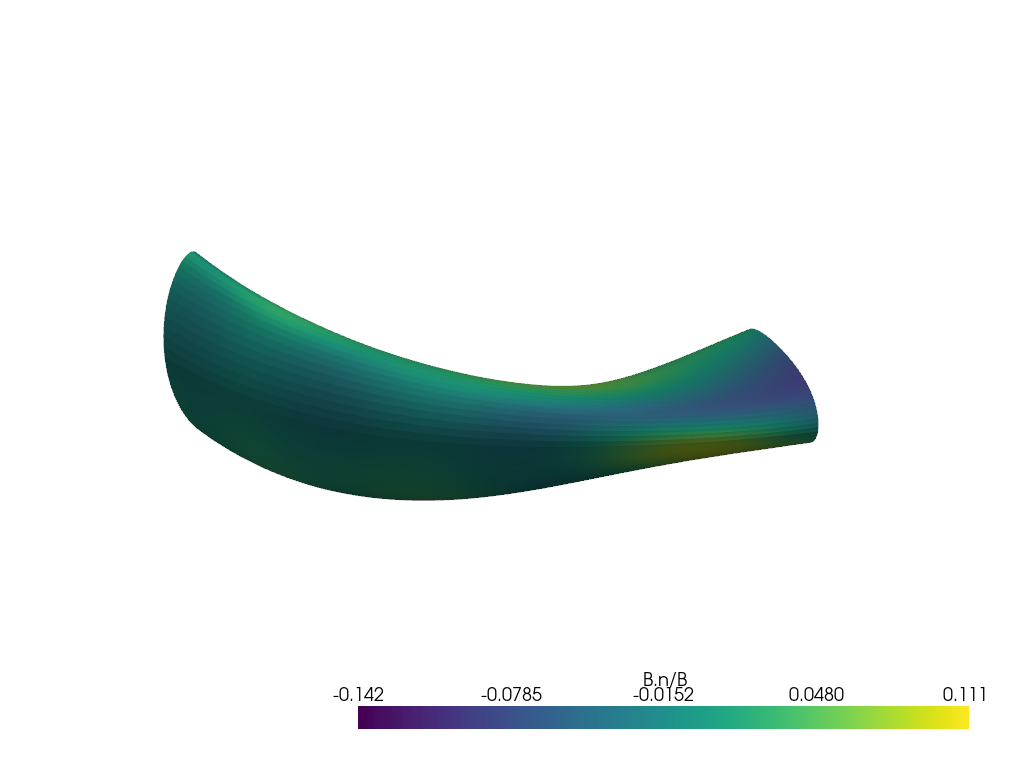

/opt/homebrew/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


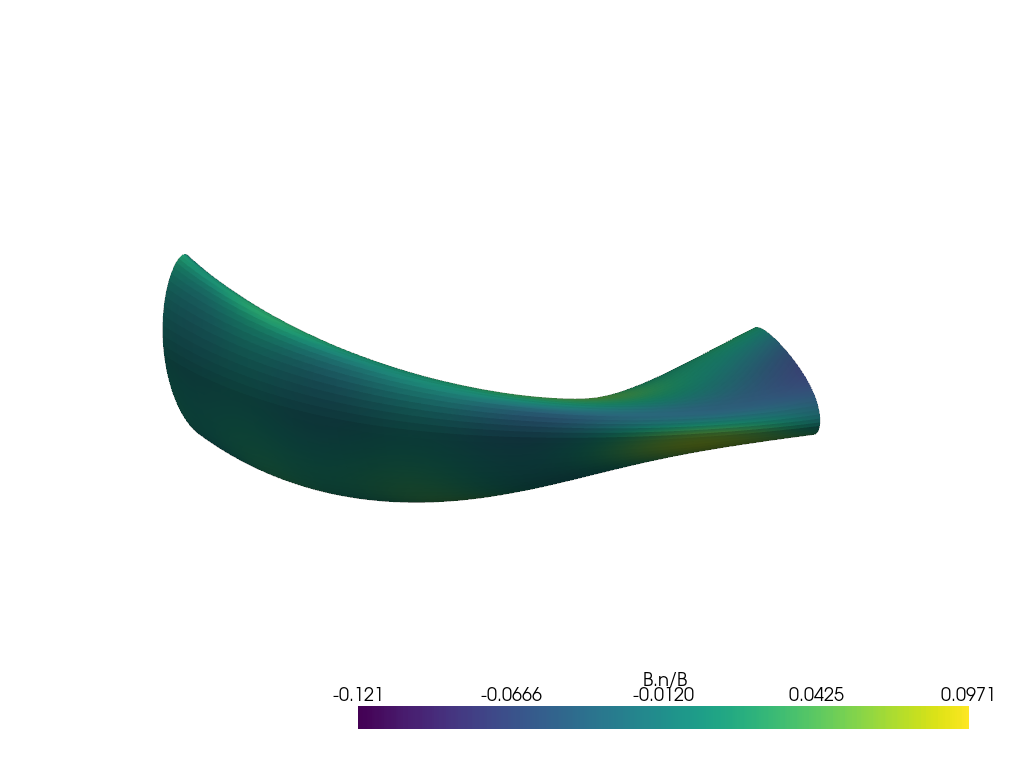

/opt/homebrew/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


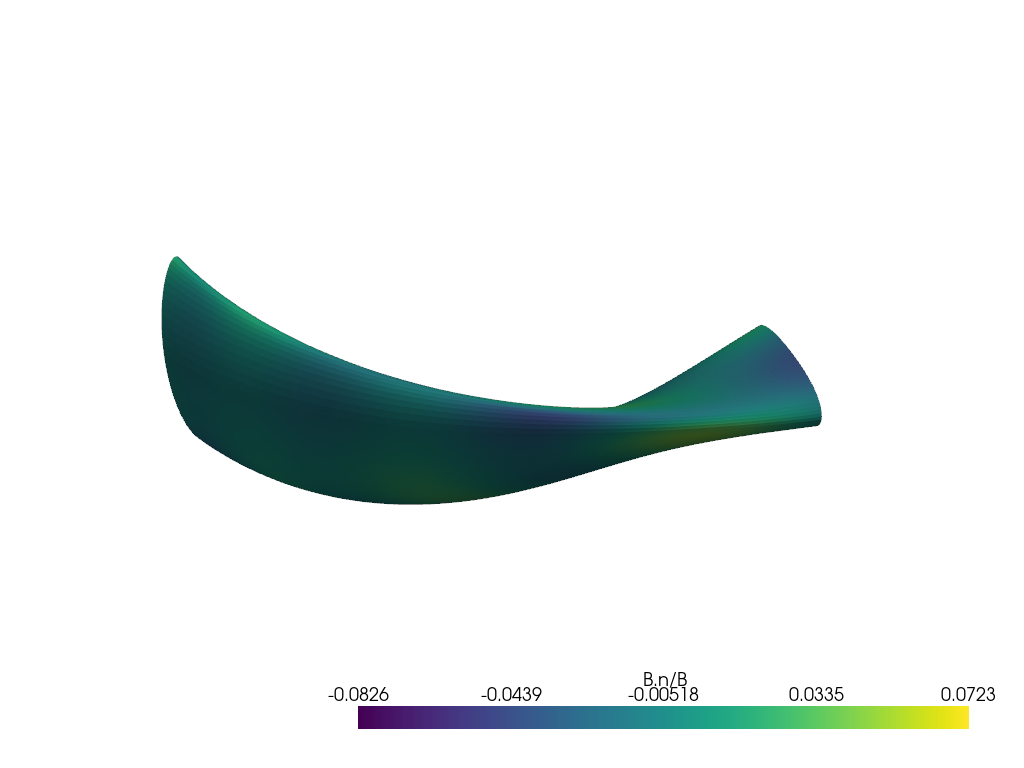

/opt/homebrew/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


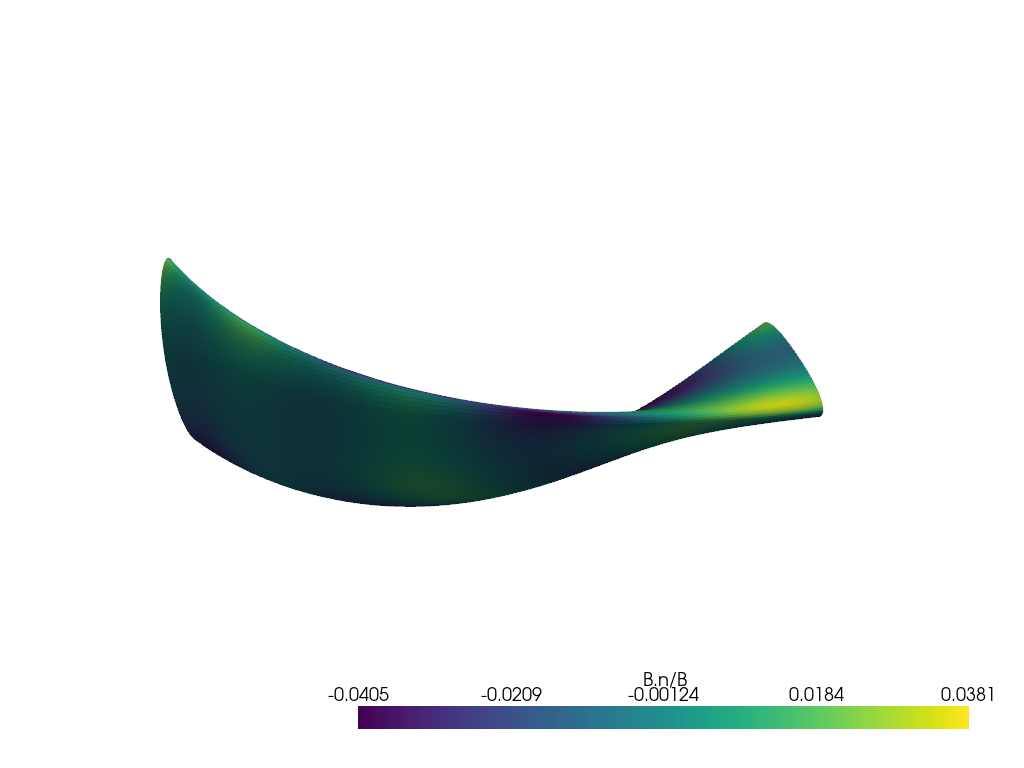

/var/folders/qz/r8tf_wnn50g4dqr38011xgb80000gn/T/ipykernel_37859/1107923933.py:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_file)


GIF created: surfs_between_nfp3/surf_between_animation.gif


In [11]:
import pyvista as pv
import imageio

# Create a list to store the file names of the PNG images
image_files = []

# Convert VTK files to PNG images and store file names
j=0
for i in range(2*N_interpolation-1):
    if i>N_interpolation-1:
        j = 2*N_interpolation-i-2
    else: j=i
    vtk_file = os.path.join(output_path, f"surf_between_halfnfp_{j}.vts")
    png_file = os.path.join(output_path, f"surf_between_halfnfp_{j}.png")

    # Read VTK file
    surf_between_vtk = pv.read(vtk_file)

    # Plot the surface and save as PNG
    plotter = pv.Plotter(off_screen=True)
    plotter.add_mesh(surf_between_vtk, scalars="B.n/B")
    plotter.set_background("white")
    plotter.show(screenshot=png_file)
    image_files.append(png_file)

# Create a gif from the PNG images
gif_file = os.path.join(output_path, "surf_between_animation.gif")
with imageio.get_writer(gif_file, mode='I') as writer:
    for image_file in image_files:
        image = imageio.imread(image_file)
        writer.append_data(image)

# Print the path to the generated gif
print(f"GIF created: {gif_file}")
